In [1]:
%matplotlib inline
#%matplotlib widget


In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact


In [3]:
################functions1##################################################################


In [8]:
expSumFileName = 'C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
expNum =17
row_bots= expSum.iloc[expNum]
row_passive=expSumPassive.iloc[expNum]
suffix='_distances.csv'
#PassiveLocatingFileName=row_passive.locatingFileNamePack
PassiveLocatingFileName='D:\\Eden\\new_exp_test_15_11_23\\29_11_23\\C0633.MP4_12_loc.csv'
print(PassiveLocatingFileName)
#PassiveLocating=pd.read_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\'+PassiveLocatingFileName,index_col=0)
PassiveLocating=pd.read_csv(PassiveLocatingFileName)
#BotLocatingFileName=row_bots['botsLocatingFileNamePack']
BotLocatingFileName='D:\\Eden\\new_exp_test_15_11_23\\29_11_23\\C0633.MP4_bot_loc.csv'
print(BotLocatingFileName)
#BotLocating=pd.read_csv('C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\'+BotLocatingFileName,index_col=0)
BotLocating=pd.read_csv(BotLocatingFileName)
PassiveFrameNum=PassiveLocating['frame']
BotsFrameNum=BotLocating['frame']
d={'frame':BotsFrameNum}
df=pd.DataFrame(data=d)


D:\Eden\new_exp_test_15_11_23\29_11_23\C0633.MP4_12_loc.csv
D:\Eden\new_exp_test_15_11_23\29_11_23\C0633.MP4_bot_loc.csv


In [9]:
df=pd.DataFrame(data=d)
distances=pd.Series()
for index, row in PassiveLocating.iterrows():
    relevant_passive_data=row
    
    relevant_bots_data=BotLocating[(BotLocating['frame']==row.frame)]
    passive_x=relevant_passive_data.x
    passive_y=relevant_passive_data.y
    bots_x=relevant_bots_data.x
    bots_y=relevant_bots_data.y
    #distance=np.sqrt(np.power((passive_x-bots_x),2)+np.power((passive_y-bots_y),2))
    distance=np.power((passive_x-bots_x),2)+np.power((passive_y-bots_y),2)
    distances=pd.concat([distances,distance],ignore_index=True)
    #distances=np.append(distances,distance)
'''
    for index in range (0,len(relevant_bots_data)):
        relevant_bot=relevant_bots_data.iloc[index]
        passive_x=relevant_passive_data.x
        passive_y=relevant_passive_data.y
        bot_x=relevant_bot.x
        bot_y=relevant_bot.y
        distance=np.sqrt(np.power((passive_x-bot_x),2)+np.power((passive_y-bot_y),2))
        distances=np.append(distances,distance)
        #particle=np.array(relevant_bot.particle)
        #particles=np.append(particles,particle)
'''
df.insert(1,"distance",distances)
#df.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\'+PassiveLocatingFileName+suffix+'test.csv')
df.to_csv('D:\\Eden\\new_exp_test_15_11_23\\29_11_23\\C0633.MP4_12_distance.csv')
df

C:\Users\User\AppData\Local\Temp\ipykernel_4468\4138415006.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distances=pd.Series()


,frame,distance
0,139.0,74665.0
1,140.0,73357.0
2,141.0,71873.0
3,142.0,71873.0
4,143.0,70217.0
...,...,...
14436,16795.0,253845.0
14437,16796.0,254116.0
14438,16798.0,261137.0
14439,16799.0,265313.0


In [5]:
df=pd.DataFrame(data=d)
distances=pd.Series()
for framenum in PassiveFrameNum:
    relevant_passive_data=PassiveLocating[(PassiveLocating['frame']==framenum)]
    relevant_bots_data=BotLocating[(BotLocating['frame']==framenum)]
    passive_x=relevant_passive_data.x.values
    passive_y=relevant_passive_data.y.values
    bots_x=relevant_bots_data.x
    bots_y=relevant_bots_data.y
    distance=np.sqrt(np.power((passive_x-bots_x),2)+np.power((passive_y-bots_y),2))
    distances=pd.concat([distances,distance],ignore_index=True)
    #distances=np.append(distances,distance)
'''
    for index in range (0,len(relevant_bots_data)):
        relevant_bot=relevant_bots_data.iloc[index]
        passive_x=relevant_passive_data.x
        passive_y=relevant_passive_data.y
        bot_x=relevant_bot.x
        bot_y=relevant_bot.y
        distance=np.sqrt(np.power((passive_x-bot_x),2)+np.power((passive_y-bot_y),2))
        distances=np.append(distances,distance)
        #particle=np.array(relevant_bot.particle)
        #particles=np.append(particles,particle)
'''
df.insert(1,"distance",distances)
df.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\'+PassiveLocatingFileName+suffix+'test.csv')
df

C:\Users\User\AppData\Local\Temp\ipykernel_60888\3976514670.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distances=pd.Series()


KeyboardInterrupt: 

In [6]:
(passive_x-bots_x)

NameError: name 'bots_x' is not defined

In [54]:
close_threshold=130
too_close_thresh=100
count=0
counts_per_frame=[]
for framenum in PassiveFrameNum:
    relevant_ditance_data=df[(df['frame']==framenum)]
    for index,row in relevant_ditance_data.iterrows():
        if (row.distance<=close_threshold)&(row.distance>too_close_thresh):
            count=count+1
    counts_per_frame.append(count)
    count=0

AttributeError: 'Series' object has no attribute 'distance'

In [9]:
close_threshold=140**2
too_close_thresh=100**2

cond = (df.distance<=close_threshold)&(df.distance>too_close_thresh)
dfC = df[cond]



In [10]:
dfCG = dfC.groupby(['frame'], as_index=False).count()

In [11]:
dfCG

,frame,distance
0,1.0,8
1,2.0,8
2,3.0,8
3,4.0,8
4,5.0,8
...,...,...
19448,27692.0,1
19449,27693.0,1
19450,27694.0,1
19451,27695.0,1


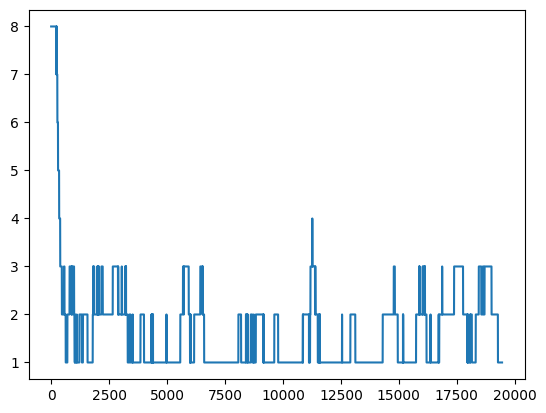

In [11]:
plt.plot(dfCG.distance)

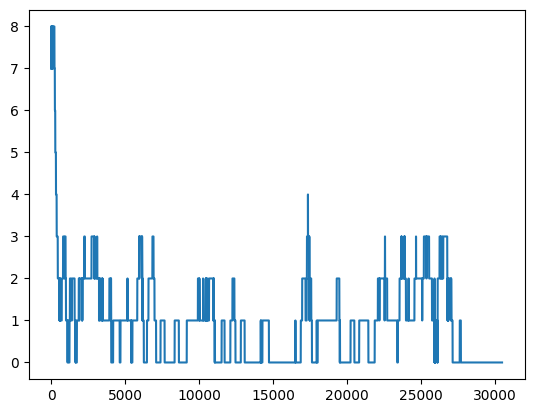

In [49]:
fps=25
time=pd.unique(df.frame)/25
plt.plot(counts_per_frame)

In [ ]:
##time measurement arcive

In [2]:
df=pd.read_csv('D:\\Eden\\5_1_23\\fronters4passive28cm\\C0560.MP4_distances.csv',index_col=0)
close_threshold=130
close_times=[]
count=0
fps=25
particels_num=pd.unique(df.particle)
for particle in particels_num:
    relevant_distance=df[(df['particle']==particle)]
    for index in range(0,len(relevant_distance)):
        row=relevant_distance.iloc[index]
        row_before=relevant_distance.iloc[index-1]
        if row.distance<=close_threshold:
            count=count+1
            if row_before.distance>close_threshold:
                print("particle:{:.2f}".format(particle))
                print(index)
        if row.distance>close_threshold:
            row_before=relevant_distance.iloc[index-1]
            if row_before.distance<=close_threshold:
                time=float(count/fps)
                print("time:{:.3f}".format(time))
                close_times.append(time)
                count=0
                print(index)
                #if ((index==0)&(particle==29)):
                    #print(index)
    if count!=0:
        time=float(count/fps)
        print("time:{:.3f}".format(time))
        close_times.append(time)
        count=0
    

particle:0.00
0
time:31.880
797
particle:0.00
799
time:0.040
800
particle:0.00
3437
time:0.040
3438
particle:0.00
3439
time:45.880
4586
particle:0.00
4587
time:0.080
4589
particle:0.00
12349
time:81.240
14380
particle:0.00
14381
time:0.240
14387
particle:0.00
17738
time:80.760
19757
particle:0.00
19758
time:0.320
19766
particle:0.00
19767
time:0.240
19773
particle:0.00
19775
time:0.680
19792
particle:0.00
19793
time:1.560
19832
particle:0.00
19834
time:1.640
19875
particle:0.00
19876
time:0.040
19877
particle:0.00
19878
time:2.480
19940
particle:0.00
19941
time:10.360
20200
particle:0.00
22633
time:0.040
22634
particle:0.00
22636
time:26.880
23308
particle:29.00
3932
time:0.040
3933
particle:29.00
3934
time:0.120
3937
particle:29.00
3940
time:0.120
3943
particle:29.00
3944
time:71.440
5730
particle:29.00
5731
time:0.080
5733
particle:29.00
5737
time:0.040
5738
particle:29.00
5743
time:0.040
5744
time:0.000
0


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1134, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 311, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [29]:
relevant_distance=df[(df['particle']==39)]

In [30]:
pd.set_option('display.max_rows', relevant_distance.shape[0]+1)
print(relevant_distance)

       frame.1    distance  particle
frame                               
4688      4688  449.161441      39.0
4690      4690  443.180550      39.0
4693      4693  451.934730      39.0
4695      4695  455.086805      39.0
4697      4697  456.974835      39.0
4698      4698  461.278658      39.0
4700      4700  461.459641      39.0
4702      4702  454.842830      39.0
4704      4704  453.982379      39.0
4705      4705  452.859802      39.0
4706      4706  456.097577      39.0
4707      4707  450.747158      39.0
4708      4708  449.755489      39.0
4709      4709  448.763858      39.0
4710      4710  447.772264      39.0
4711      4711  445.660184      39.0
4712      4712  443.806264      39.0
4713      4713  444.797707      39.0
4714      4714  443.676684      39.0
4715      4715  446.189422      39.0
4716      4716  440.832168      39.0
4717      4717  445.336951      39.0
4718      4718  437.858425      39.0
4719      4719  437.858425      39.0
4720      4720  437.992009      39.0
4

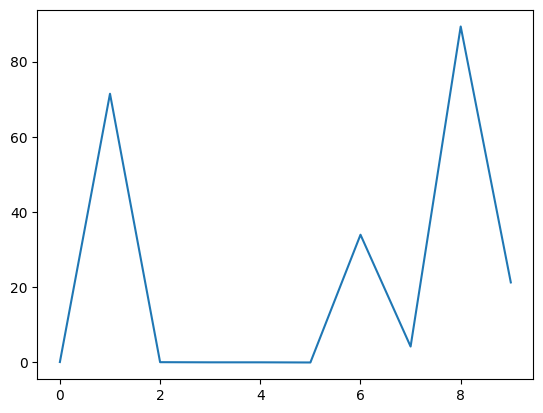

In [19]:
plt.plot(close_times[20:30])

In [17]:
np.where(close_times==np.min(close_times))

(array([25], dtype=int64),)

(array([44.,  6.,  4.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

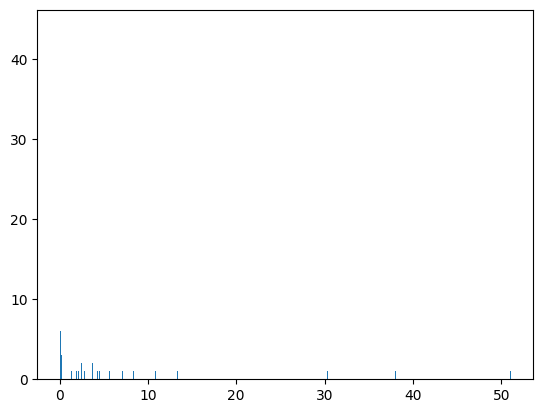

In [30]:
plt.hist(close_times,bins=1000)

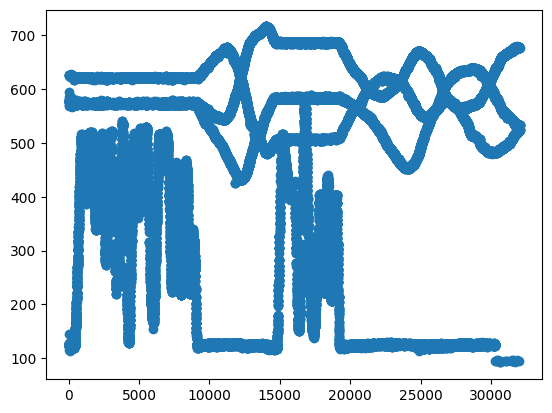

In [6]:
plt.plot(df.distance,'o')
#plt.axis([0,5000,100,700])

In [20]:
botlocatingname=row.botLocatingFileName
botlocating=pd.read_csv(botlocatingname,index_col=0)
botlocating

,frame,x,y,r
0,1.0,780.5,545.5,11.4
1,1.0,358.5,44.5,11.4
2,2.0,782.5,546.5,8.0
3,2.0,132.5,874.5,6.9
4,2.0,1042.5,83.5,6.9
...,...,...,...,...
118386,32027.0,358.5,45.5,11.4
118387,32027.0,152.5,909.5,11.4
118388,32028.0,529.5,415.5,11.4
118389,32028.0,358.5,45.5,11.4
